In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
x = pd.DataFrame(data['data'] , columns=data['feature_names'])

In [5]:
y = pd.Series(data['target']).map({0:'malignant',1:'benign'})

In [6]:
# Noted = standardScaler

## StandardScaler 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler_transformer = scaler.fit(x)

In [10]:
x_scaled = scaler_transformer.transform(x)

In [11]:
x_scaled= pd.DataFrame(x_scaled,columns=x.columns)

## Modelling Without PCA

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
cv_score = cross_val_score(LogisticRegression(),x_scaled,y,cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
cv_score.mean()

0.9771619225844578

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,random_state=101)
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
prediction = log_model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      benign       0.99      1.00      0.99        88
   malignant       1.00      0.98      0.99        55

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Modelling With PCA

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca =  PCA(n_components=2)

In [19]:
x_pca_2 = pca.fit_transform(x_scaled)

In [20]:
x_pca_2 = pd.DataFrame(x_pca_2,columns=['PCA 1' , 'PCA 2'])

In [21]:
cv_score = cross_val_score(LogisticRegression(),x_pca_2,y,cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
cv_score.mean()

0.9525755934206639

## Find Best N PCA

In [23]:
cv_scores = []
for item in range(1,11):
    x_pca = PCA(n_components=item).fit_transform(x_scaled)
    cv_mean = cross_val_score(LogisticRegression(),x_pca,y,cv=4).mean()
    cv_scores.append(cv_mean)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

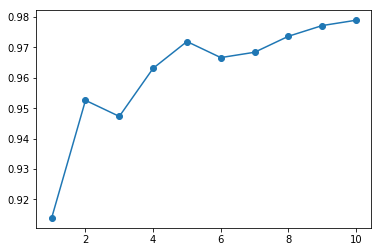

In [24]:
plt.plot([1,2,3,4,5,6,7,8,9,10], cv_scores,marker = 'o')

## Modelling With 10 n_components

In [25]:
pca = PCA(n_components=10)

In [26]:
pca_transformer = pca.fit(x_scaled)

In [27]:
x_pca_10 = pca_transformer.transform(x_scaled)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(x_pca_10,y,random_state=101)

In [29]:
log_model_pca_10 = LogisticRegression().fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
prediction = log_model_pca_10.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99        88
   malignant       0.98      0.98      0.98        55

   micro avg       0.99      0.99      0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



## Simple Prediction

In [31]:
new_data = x.iloc[0]

In [35]:
## StandardSCaler
## PCA to 10
new_data = list(new_data)

In [38]:
new_data_scaled = scaler_transformer.transform([new_data])

In [40]:
new_data_pca_10 = pca_transformer.transform(new_data_scaled)

In [41]:
log_model_pca_10.predict(new_data_pca_10)

array(['malignant'], dtype=object)

In [42]:
y.iloc[0]

'malignant'